In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
## Splitting data into train and test sets (to prevent overfitting or overgeneralization).
from sklearn.model_selection import train_test_split
## Since the dataset has both numerical and categorical values, Random Forest Classifier is appropriate to handle classification whether IPOs are good or bad investments. It uses a decision tree model.
from sklearn.ensemble import RandomForestClassifier
## Classification report gives precision, recall, F-1 score, and accuracy for each class. Confusion matrix shows how many predictions are correct vs incorrect in a matrix format.
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
## Importing dataset into Python.
df = pd.read_csv('/Users/jesslyngabriella/Downloads/cleaned_IPO.csv')

In [3]:
## Formatting ipoDate column into datetime format.
df['ipoDate'] = pd.to_datetime(df['ipoDate'], errors='coerce')

/var/folders/6c/jcx5j1b17kj0jmlg2y1x_75w0000gn/T/ipykernel_95719/93844215.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['ipoDate'] = pd.to_datetime(df['ipoDate'], errors='coerce')


In [4]:
df['ipoDate']

0      1999-11-18
1      2014-10-02
2      2013-09-26
3      2001-11-29
4      2011-01-13
          ...    
3695   2005-05-06
3696   2018-04-12
3697   2011-05-12
3698   2017-04-28
3699   2015-08-05
Name: ipoDate, Length: 3700, dtype: datetime64[ns]

In [5]:
## Replacing NaN with 0.
df.fillna(0, inplace=True)

In [6]:
df

,Symbol,Name,ipoDate,DaysBetterThanSP,daysProfit,exactDiffernce,closeDay0,closeDay5,closeDay30,closeDay90,...,Industry,employees,Revenue,netIncome,YearFounded,CEOGender,CEOInChargeDuringIPO,Year,Month,dayOfWeek
0,A,"Agilent Technologies, Inc.",1999-11-18,122,249,0.0,28.6358,27.6676,52.9762,80.6438,...,Biotechnology: Laboratory Analytical Instruments,13500,$4.47B,$684.00M,1999,male,No,1999,11,3
1,AAC,"AAC Holdings, Inc.",2014-10-02,131,262,232.0,18.5000,19.2500,26.7600,28.5000,...,Medical Specialities,2100,$317.64M,$-20.58M,2014,male,Yes,2014,10,3
2,AAOI,"Applied Optoelectronics, Inc.",2013-09-26,125,262,6054.0,9.9600,10.0000,13.0000,14.0000,...,Semiconductors,3054,$382.33M,$73.95M,1997,unknown,No,2013,9,3
3,AAP,Advance Auto Parts Inc,2001-11-29,128,261,0.0,13.9000,14.5730,14.0330,14.6600,...,Other Specialty Stores,71000,$9.37B,$475.51M,1929,male,No,2001,11,3
4,AAT,"American Assets Trust, Inc.",2011-01-13,123,127,181.0,21.2500,21.2100,21.0800,21.9500,...,Real Estate Investment Trusts,194,$311.68M,$29.08M,2010,male,No,2011,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3695,ZUMZ,Zumiez Inc.,2005-05-06,139,261,0.0,12.4350,11.5600,15.1250,16.8950,...,Clothing/Shoe/Accessory Stores,8900,$927.40M,$26.80M,1978,male,No,2005,5,4
3696,ZUO,"Zuora, Inc.",2018-04-12,5,7,0.0,20.0000,19.6500,0.0000,0.0000,...,0,933,$167.93M,$-47.16M,2007,mostly_male,Yes,2018,4,3
3697,ZX,China Zenix Auto International Limited,2011-05-12,102,25,1035.0,5.8500,6.0500,5.4460,4.4000,...,Auto Parts:O.E.M.,-,$418.90M,$1.34M,2008,unknown,0,2011,5,3
3698,ZYME,Zymeworks Inc.,2017-04-28,115,19,0.0,13.0000,13.0500,9.3800,8.2100,...,Major Pharmaceuticals,147,$51.76M,$-10.41M,2003,0,0,2017,4,4


In [7]:
## Checking the unique values in the CEOGender column.
df['CEOGender'].unique()

array(['male', 'unknown', '0', 'mostly_female', 'female', 'mostly_male',
       'andy'], dtype=object)

In [8]:
## Encoding the male, female, mostly_male, and mostly_female values.
df['CEOGender'] = df['CEOGender'].map({'male':1, 'female':2, 'mostly_male':1, 'mostly_female':2})

In [9]:
df['CEOGender']

0       1.0
1       1.0
2       NaN
3       1.0
4       1.0
       ... 
3695    1.0
3696    1.0
3697    NaN
3698    NaN
3699    1.0
Name: CEOGender, Length: 3700, dtype: float64

In [10]:
## Replacing NaN values with 0.
df.fillna(0, inplace=True)

In [11]:
df

,Symbol,Name,ipoDate,DaysBetterThanSP,daysProfit,exactDiffernce,closeDay0,closeDay5,closeDay30,closeDay90,...,Industry,employees,Revenue,netIncome,YearFounded,CEOGender,CEOInChargeDuringIPO,Year,Month,dayOfWeek
0,A,"Agilent Technologies, Inc.",1999-11-18,122,249,0.0,28.6358,27.6676,52.9762,80.6438,...,Biotechnology: Laboratory Analytical Instruments,13500,$4.47B,$684.00M,1999,1.0,No,1999,11,3
1,AAC,"AAC Holdings, Inc.",2014-10-02,131,262,232.0,18.5000,19.2500,26.7600,28.5000,...,Medical Specialities,2100,$317.64M,$-20.58M,2014,1.0,Yes,2014,10,3
2,AAOI,"Applied Optoelectronics, Inc.",2013-09-26,125,262,6054.0,9.9600,10.0000,13.0000,14.0000,...,Semiconductors,3054,$382.33M,$73.95M,1997,0.0,No,2013,9,3
3,AAP,Advance Auto Parts Inc,2001-11-29,128,261,0.0,13.9000,14.5730,14.0330,14.6600,...,Other Specialty Stores,71000,$9.37B,$475.51M,1929,1.0,No,2001,11,3
4,AAT,"American Assets Trust, Inc.",2011-01-13,123,127,181.0,21.2500,21.2100,21.0800,21.9500,...,Real Estate Investment Trusts,194,$311.68M,$29.08M,2010,1.0,No,2011,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3695,ZUMZ,Zumiez Inc.,2005-05-06,139,261,0.0,12.4350,11.5600,15.1250,16.8950,...,Clothing/Shoe/Accessory Stores,8900,$927.40M,$26.80M,1978,1.0,No,2005,5,4
3696,ZUO,"Zuora, Inc.",2018-04-12,5,7,0.0,20.0000,19.6500,0.0000,0.0000,...,0,933,$167.93M,$-47.16M,2007,1.0,Yes,2018,4,3
3697,ZX,China Zenix Auto International Limited,2011-05-12,102,25,1035.0,5.8500,6.0500,5.4460,4.4000,...,Auto Parts:O.E.M.,-,$418.90M,$1.34M,2008,0.0,0,2011,5,3
3698,ZYME,Zymeworks Inc.,2017-04-28,115,19,0.0,13.0000,13.0500,9.3800,8.2100,...,Major Pharmaceuticals,147,$51.76M,$-10.41M,2003,0.0,0,2017,4,4


In [12]:
## Encoding values in the CEOInChargeDuringIPO column.
df['CEOInChargeDuringIPO'] = df['CEOInChargeDuringIPO'].map({'Yes':2, 'No':1})

In [13]:
df['CEOInChargeDuringIPO']

0       1.0
1       2.0
2       1.0
3       1.0
4       1.0
       ... 
3695    1.0
3696    2.0
3697    NaN
3698    NaN
3699    2.0
Name: CEOInChargeDuringIPO, Length: 3700, dtype: float64

In [14]:
## Replacing NaN values with 0.
df.fillna(0, inplace=True)

In [15]:
df['CEOInChargeDuringIPO']

0       1.0
1       2.0
2       1.0
3       1.0
4       1.0
       ... 
3695    1.0
3696    2.0
3697    0.0
3698    0.0
3699    2.0
Name: CEOInChargeDuringIPO, Length: 3700, dtype: float64

In [16]:
df

,Symbol,Name,ipoDate,DaysBetterThanSP,daysProfit,exactDiffernce,closeDay0,closeDay5,closeDay30,closeDay90,...,Industry,employees,Revenue,netIncome,YearFounded,CEOGender,CEOInChargeDuringIPO,Year,Month,dayOfWeek
0,A,"Agilent Technologies, Inc.",1999-11-18,122,249,0.0,28.6358,27.6676,52.9762,80.6438,...,Biotechnology: Laboratory Analytical Instruments,13500,$4.47B,$684.00M,1999,1.0,1.0,1999,11,3
1,AAC,"AAC Holdings, Inc.",2014-10-02,131,262,232.0,18.5000,19.2500,26.7600,28.5000,...,Medical Specialities,2100,$317.64M,$-20.58M,2014,1.0,2.0,2014,10,3
2,AAOI,"Applied Optoelectronics, Inc.",2013-09-26,125,262,6054.0,9.9600,10.0000,13.0000,14.0000,...,Semiconductors,3054,$382.33M,$73.95M,1997,0.0,1.0,2013,9,3
3,AAP,Advance Auto Parts Inc,2001-11-29,128,261,0.0,13.9000,14.5730,14.0330,14.6600,...,Other Specialty Stores,71000,$9.37B,$475.51M,1929,1.0,1.0,2001,11,3
4,AAT,"American Assets Trust, Inc.",2011-01-13,123,127,181.0,21.2500,21.2100,21.0800,21.9500,...,Real Estate Investment Trusts,194,$311.68M,$29.08M,2010,1.0,1.0,2011,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3695,ZUMZ,Zumiez Inc.,2005-05-06,139,261,0.0,12.4350,11.5600,15.1250,16.8950,...,Clothing/Shoe/Accessory Stores,8900,$927.40M,$26.80M,1978,1.0,1.0,2005,5,4
3696,ZUO,"Zuora, Inc.",2018-04-12,5,7,0.0,20.0000,19.6500,0.0000,0.0000,...,0,933,$167.93M,$-47.16M,2007,1.0,2.0,2018,4,3
3697,ZX,China Zenix Auto International Limited,2011-05-12,102,25,1035.0,5.8500,6.0500,5.4460,4.4000,...,Auto Parts:O.E.M.,-,$418.90M,$1.34M,2008,0.0,0.0,2011,5,3
3698,ZYME,Zymeworks Inc.,2017-04-28,115,19,0.0,13.0000,13.0500,9.3800,8.2100,...,Major Pharmaceuticals,147,$51.76M,$-10.41M,2003,0.0,0.0,2017,4,4


In [17]:
## Calculating the returns 5-day, 30-day, and 90-day post-IPO.
df['day5return'] = ((df['closeDay5'] - df['closeDay0']) / df['closeDay0']) * 100
df['day30return'] = ((df['closeDay30'] - df['closeDay0']) / df['closeDay0']) * 100
df['day90return'] = ((df['closeDay90'] - df['closeDay0']) / df['closeDay0']) * 100

In [36]:
## Defining 'good_investment' as investments where DaysBetterThanSP > 90 days or day90return is positive. 2 if it is a good investment and 1 if it is a bad investment.
df['good_investment'] = np.where((df['DaysBetterThanSP'] >= 90) | (df['day90return'] > 0), 2, 1)

In [19]:
## Machine Learning Projection - predicting whether an IPO is a good investment based on features.
features = ['daysProfit', 'closeDay0', 'volumeDay0', 'volumeDay1', 'employees', 'Revenue', 'netIncome', 'YearFounded', 'CEOGender', 'CEOInChargeDuringIPO'] + \
[col for col in df.columns if col.startswith('Sector') or
 col.startswith('Industry') or
 col.startswith('dayOfWeek') or
 col.startswith('Month') or
 col.startswith('Year')]

In [20]:
## X = independent variables, y = dependent variables
X = df[features].copy()
y = df['good_investment']

In [21]:
## 20% of the data for testing and 80% of the data for training and using the same random shuffle for every run so that it is easier to compare models.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [22]:
## Building a model with 100 decision trees and a fixed seed of randomness.
model = RandomForestClassifier(n_estimators = 100, random_state = 42)

In [23]:
model.fit(X_train, y_train)

ValueError: could not convert string to float: '-'

In [24]:
## Replacing '-' with NaN.
X_train.replace('-', np.nan, inplace = True)
X_test.replace('-', np.nan, inplace = True)

In [25]:
## Filling NaN values with 0.
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)

In [26]:
## Checking how many '-' values in the dataset.
(X_train == '-').sum()

daysProfit              0
closeDay0               0
volumeDay0              0
volumeDay1              0
employees               0
Revenue                 0
netIncome               0
YearFounded             0
CEOGender               0
CEOInChargeDuringIPO    0
Sector                  0
Industry                0
YearFounded             0
Year                    0
Month                   0
dayOfWeek               0
dtype: int64

In [27]:
model.fit(X_train, y_train)

ValueError: could not convert string to float: '$39.62M'

In [28]:
## Changing data type to numeric.
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

In [29]:
## The model has been correctly initialized after changing the data type to numeric.
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [30]:
## Checking the data types.
X_train.dtypes

daysProfit                int64
closeDay0               float64
volumeDay0              float64
volumeDay1              float64
employees                 int64
Revenue                 float64
netIncome               float64
YearFounded               int64
CEOGender               float64
CEOInChargeDuringIPO    float64
Sector                  float64
Industry                float64
YearFounded               int64
Year                      int64
Month                     int64
dayOfWeek                 int64
dtype: object

In [31]:
y_pred = model.predict(X_test)

In [32]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.78      0.61      0.69        98
           2       0.94      0.97      0.96       642

    accuracy                           0.93       740
   macro avg       0.86      0.79      0.82       740
weighted avg       0.92      0.93      0.92       740

[[ 60  38]
 [ 17 625]]


Class 2 represents IPOs as good investments.
Class 1 represents IPOs as bad investments.

Interpretation:
Class 2
Precision = 94% of predicted good investments were actually good investments. 
Recall = 97% of actual good investments were caught in the model.
F-1 score = this is a balanced metric of Precision and Recall. 0.96 represents a strong overall performance.

Class 1
Precision = 78% of predicted bad investments were bad investments.
Recall = 61% of actual bad investments were caught in the model.
F-1 score = this is a balanced metric of Precision and Recall. 0.69 shows a moderate performance.

Support
642 samples of Class 2
98 samples of Class 1

Overall 
93% of total predictions across all classes were correct.

Confusion matrix
[[ 60  38]
 [ 17 625]]

60 (TP)
38 (FN)
17 (FP)
625 (TN)

60 Class 1 samples were correctly classified as Class 1.
38 Class 1 samples were incorrectly classified as Class 2.
17 Class 2 samples were incorrectly classified as Class 1.
625 Class 2 samples were correctly classified as Class 2.

Conclusion
The model performs really well in predicting Class 2 and the model struggles to predict Class 1 most likely due to class imbalance (Support of 642 vs 98).

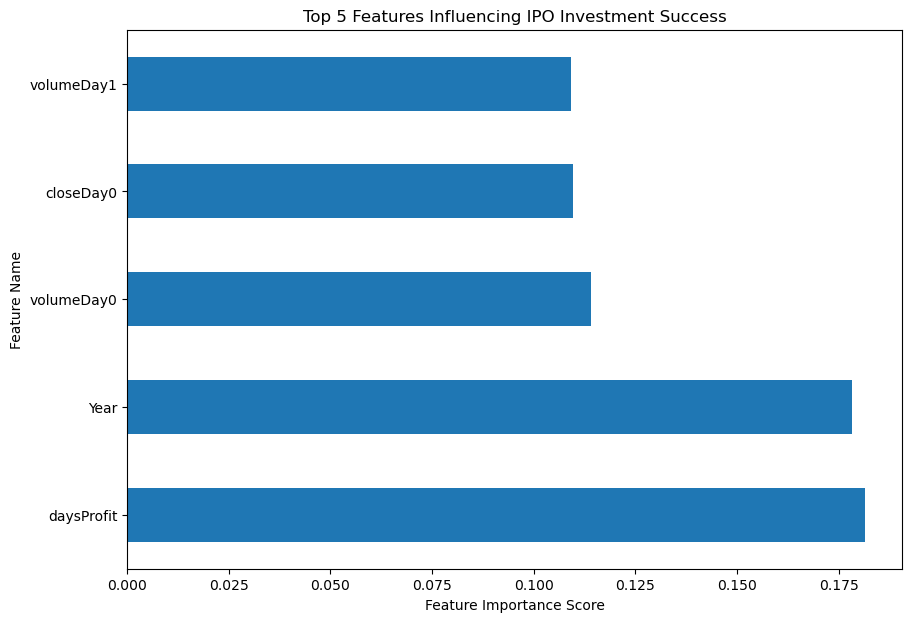

In [41]:
## Checking the importance of features.

features = pd.Series(model.feature_importances_, index=X.columns)
features.nlargest(5).plot(kind='barh', figsize=(10, 7))
plt.title('Top 5 Features Influencing IPO Investment Success')
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature Name')
plt.show()

In [34]:
sector_perf = df.groupby('Sector')['good_investment'].mean()

In [35]:
sector_perf

Sector
0                        1.915902
Basic Industries         1.862069
Capital Goods            1.913043
Consumer Durables        1.885246
Consumer Non-Durables    1.884615
Consumer Services        1.892100
Energy                   1.922222
Finance                  1.773424
Health Care              1.857143
Miscellaneous            1.906542
Public Utilities         1.936000
Technology               1.891566
Transportation           1.880000
Name: good_investment, dtype: float64

Public utilities sector has the highest 'good_investment' score. 

In [37]:
df['good_investment']

0       2
1       2
2       2
3       2
4       2
       ..
3695    2
3696    1
3697    2
3698    2
3699    2
Name: good_investment, Length: 3700, dtype: int64

In [40]:
df['good_investment'].value_counts()

good_investment
2    3236
1     464
Name: count, dtype: int64